<a href="https://colab.research.google.com/github/Vithushan4/Vithushan4/blob/main/Portfolio_Item_2_Analysis_on_Farm_Capital%2C_Revenue%2C_and_Expenses_in_Ontario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Portfolio Item 2 Analysis on Farm Capital, Revenue, and Expenses in Ontario
- Name: Vithushan Umaputhiran
- Date: October 4th, 2024



***Research Question:*** What are the trends in farm capital, revenue, and expenses in Ontario? Is this sector of agriculture profitable?

***Introduction:***
This Python notebook was created to analyze census data retrieved from Statistics Canada on the trends in farm capital, revenue, and expenses, using bar chart visualizations.

The following will be analyzed:

- The number of farms reporting each year in Ontario.
- Side-by-side comparison between revenues and expenses for farms in Ontario.
- A visualization of the total farm capital in Ontario.

***About the Dataset:***
The dataset used for this analysis is census data from Statistics Canada, titled Farm Capital, Operating Revenues and Operating Expenses: Census of Agriculture Historical Data. It includes dollar values of total farm capital, operating revenue, and operating expenses from five-year intervals from 2001 to 2021 across all of Canada. The number of farms that reported these values is also provided.

*Link to Dataset: https://www150.statcan.gc.ca/t1/tbl1/en/cv.action?pid=3210016401*





***Retrieval, Preparation, and Cleaning Up of Dataset:***
Before importing the data into this Python notebook, the census data had to be filtered and cleaned up. The tools used for this were Statistics Canada and Microsoft Excel.

Filtering the Data Prior to Downloading from Statistics Canada:

- Prior to downloading the census data as a CSV file, the data had to be filtered to include both Canada and Ontario. By default, the provided data only allowed the selection of one geographic location. However, using the "Customize Data" option, it was possible to include both Ontario and Canada in the dataset.

Cleaning Up the Data for Use in Python:

- After downloading the dataset as a CSV file, the headings and footers had to be removed. The formatting of the data was also not set up correctly; rows and columns had to be rearranged for ease of use in Python.

- The reformatting and cleaning of the data were done using Microsoft Excel.

**Before Data Cleanup:** 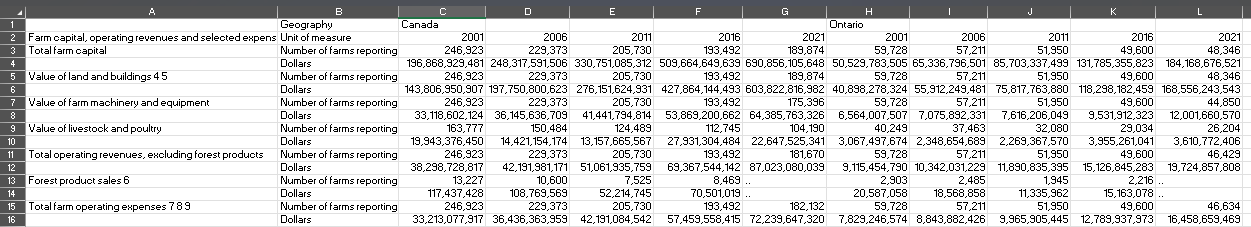

**After Data Cleanup:**

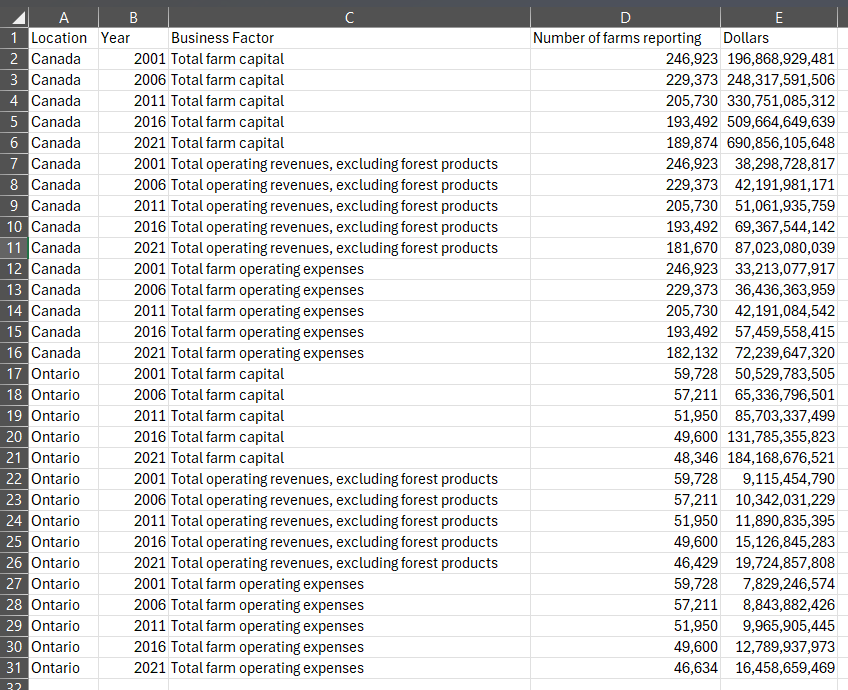


***Review of Developing Python Visualizations:***
 The process of filtering and reformatting the dataset was fairly straightforward. The real challenge began when coding the visualizations. One of the main challenges was getting used to the syntax for each of the Python libraries and understanding what types of logic are and are not allowed. For example, when using Seaborn, I had to ensure that values such as "Year" and "Number of farms reporting" were converted from strings to integers so that they could be used correctly for the visualizations. Another example is the need to use a DataFrame as the data source when creating a bar plot with the Seaborn library. The Python language was fairly easy to understand, as it is closer to human language

***Conclusion and Interpretations:*** In conclusion, there is a clear trend of increased revenue, expenses, and capital in Ontario farms. These three factors have continuously increased as the years progressed, with 2021 being the highest year for all three business factors. However, the number of farms reporting has decreased throughout the years. This indicates that the farming sector is indeed profitable, as the quantity of farms reporting is decreasing alongside the increases in revenue, expenses, and capital. The upward trend in these three business factors demonstrates the high demand for the farming sector.


# Importing and Reformatting Dataset for Visualizations

In this section, the CSV dataset is retrieved from Google Drive to be used throughout this notebook. A connection is made to Google Drive using the file path of the dataset. Columns such as Year, Number of farms reporting, and Dollars are cleaned up and converted into integer values to be used in the visualizations.

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting and loading the csv dataset from google drive
df = pd.read_csv('/content/drive/MyDrive/Canada Farm Business.csv')

#df = pd.read_csv('Canada Farm Business.csv')

# Converting the "Year" column to integer
df.Year = df.Year.astype(int)

# Remove commas and convert "Number of farms reporting" to integers
df['Number of farms reporting'] = df['Number of farms reporting'].str.replace(',', '').astype(int)

# Remove commas and convert "Dollars" to integers
df.Dollars = df.Dollars.str.replace(',', '').astype(int)   # Convert to millions


Mounted at /content/drive


# Visualization 1: Number of Farms Reporting From 2001 to 2021

This first bar plot provides an understanding of the number of farms reporting this data, which will help us eliminate possible misinterpretations of the dollar values in capital, revenue, and expenses. Understanding the number of farms reporting relative to the dollar values will help us better compare these figures throughout the years. As presented, for the most part, the numbers stayed consistent over the years, except for 2021, where there is a noticeable difference in the number of farms reporting for each of the categories.

***Explanation of Python Code:*** To develop this visualization, a DataFrame for Ontario was created to filter the dataset to show only data from Ontario between the years 2001 and 2021. Using this DataFrame, the sns.barplot code was applied to create the visualization. The x, y, and hue values were specified to output the values accordingly on the graph. Lastly, the graph's axis titles and legend formatting were adjusted to tidy up the view

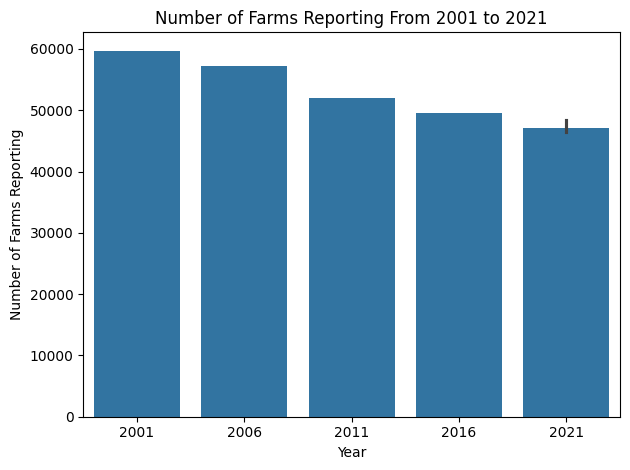

In [ ]:
# Creating a dataframe to filter the data for Ontario from 2001 to 2021
# Creating a dataframe to filter the data for Ontario from 2001 to 2021
ontario = df.loc[(df.Location == 'Ontario') & (df.Year.between(2001, 2021))]

#print(ontario[ontario['Number of farms reporting'] > 0])

# Creating a clustered column chart
sns.barplot(
    x='Year',
    y='Number of farms reporting',
    data=ontario,
)

# Add titles and labels to the chart
plt.title('Number of Farms Reporting From 2001 to 2021')
plt.xlabel('Year')
plt.ylabel('Number of Farms Reporting')


# Displaying the chart with legend adjustments
plt.tight_layout()
plt.show()

# Visualization 2: Comparing Farm Operating Revenue and Expenses in Ontario

Now that we have an understanding of the relative number of farms that reported each year, we can compare the reported operating revenue and expenses of Ontario farms for the years 2001, 2006, 2011, 2016, and 2021. From the visualization below, it is clear that revenue and expenses have increased throughout the years. The relative increase between revenues and expenses has also grown at a similar pace each year. An interesting point to note is that the number of farms that reported their data has decreased with each progressing year (as shown in the previous visualization). Despite this decrease, revenues and expenses continued to increase.

***Explanation of Python Code:*** To develop this visualization, a DataFrame for Ontario was created to filter the dataset to show only data from Ontario between the years 2001 and 2021. Next, that DataFrame was filtered to include the business factors representing revenue and expenses. The hue was used to display both values side by side on the bar graph, allowing for a clean comparison between the two categories.

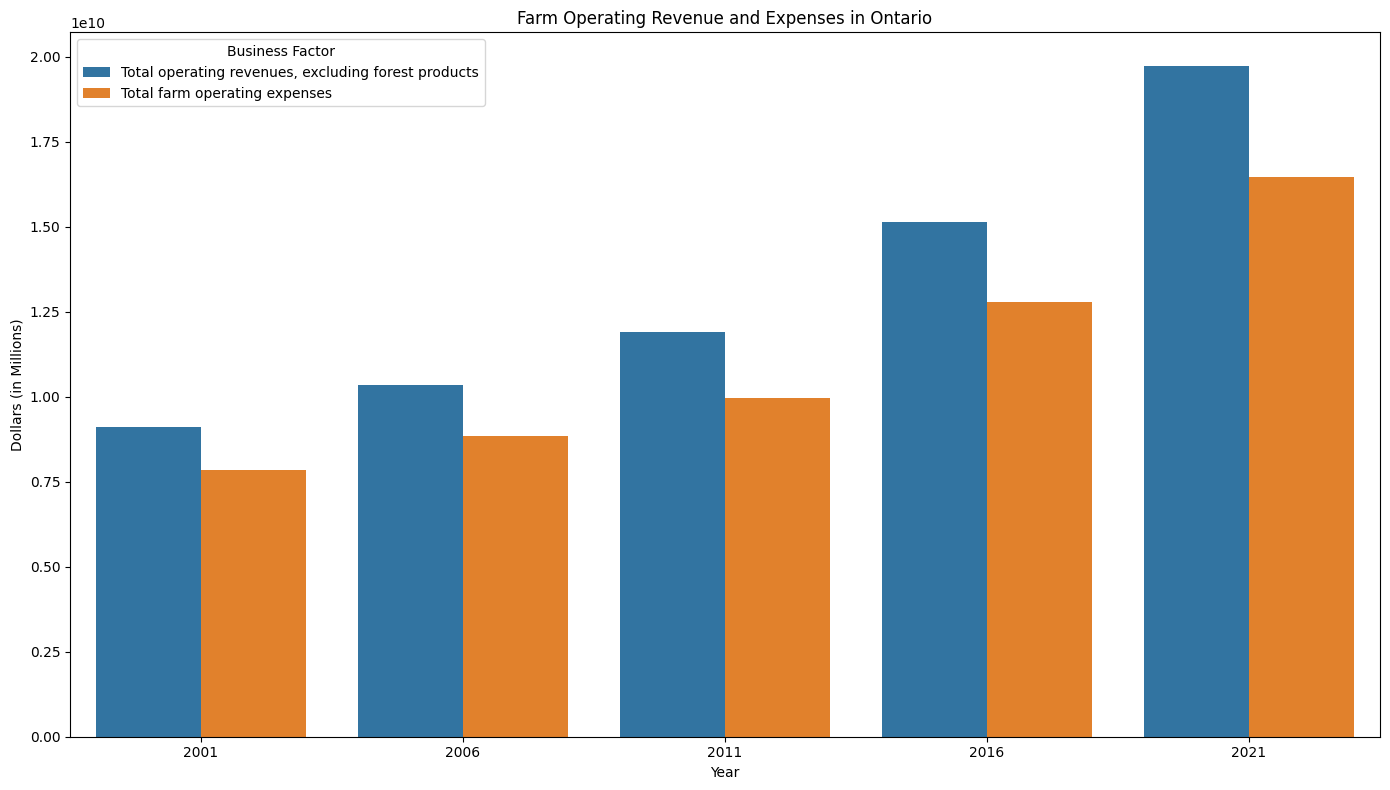

In [ ]:
# Creating a dataframe to filter the data for Ontario from 2001 to 2021
ontario = df.loc[(df.Location == 'Ontario') & (df.Year.between(2001, 2021))]

# Filter 'ontario' dataframe to include only revenues and expenses
ontario = ontario[ontario['Business Factor'].isin(['Total operating revenues, excluding forest products', 'Total farm operating expenses'])]

##print(ontario[ontario['Business Factor'] == 'Total operating revenues, excluding forest products'])

# Set the figure size of visualization
plt.figure(figsize=(14, 8))

# Creating a clustered column chart
sns.barplot(
    x='Year',
    y='Dollars',
    data=ontario,

    #to convert the bar plot into a clustered column chart
    hue='Business Factor'
)

# Add titles and labels to the chart
plt.title('Farm Operating Revenue and Expenses in Ontario')
plt.xlabel('Year')
plt.ylabel('Dollars (in Millions)')

# Displaying the chart with legend adjustments
plt.legend(title='Business Factor', bbox_to_anchor=(0, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization 3: Total Farm Capital in Ontario

After comparing the revenues and expenses of farming in Ontario, we can now analyze the total farm capital throughout the years. Total farm capital represents the value of land, machinery, equipment, livestock, etc. The following visualization illustrates the total farm capital over the years. Similar to the comparison of revenues and expenses, total farm capital also shows an increasing trend as the years progress.

***Explanation of Python Code:*** To develop this visualization, a DataFrame for Ontario was created to filter the dataset to show only data from Ontario between the years 2001 and 2021. Next, that DataFrame was filtered to include only the total farm capital.

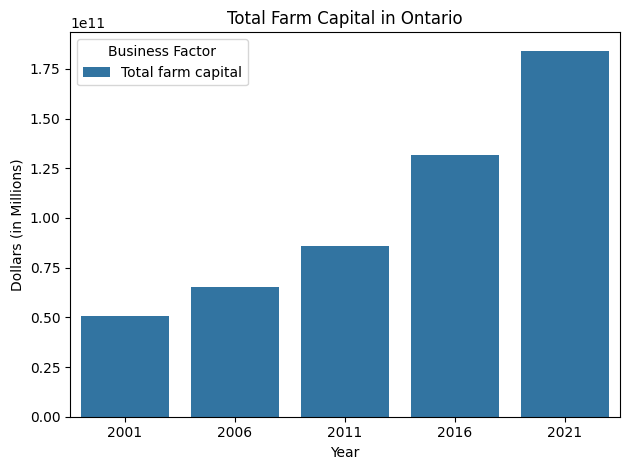

In [ ]:
# Creating a dataframe to filter the data for Ontario from 2001 to 2021
ontario = df.loc[(df.Location == 'Ontario') & (df.Year.between(2001, 2021))]

# Filter 'ontario' dataframe to include only revenues and expenses
ontario = ontario[ontario['Business Factor'].isin(['Total farm capital'])]

# Creating a clustered column chart
sns.barplot(
    x='Year',
    y='Dollars',
    data=ontario,

    #to convert the bar plot into a clustered column chart
    hue='Business Factor',
)

# Add titles and labels to the chart
plt.title('Total Farm Capital in Ontario')
plt.xlabel('Year')
plt.ylabel('Dollars (in Millions)')

# Displaying the chart with legend adjustments
plt.tight_layout()
plt.show()